# Online Retail Exploratory Data Analysis with Python by Feechi Onyenali Mgbeoduru

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset I will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is included in this project. It can also be downloaded at: (https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

Online Retail Exploraty Data Analysis by Feechi Onyenali Mgbeoduru

Description of My Approach
I began by cleaning the dataset — removing missing values, filtering out negative quantities and zero-priced items to ensure accurate analysis. I created new features such as TotalSales, Month, and DayOfWeek to explore time-based trends and sales performance.

Next, I analyzed product-level and country-level sales to identify top-performing items and markets. I used visualizations like bar plots and box plots to highlight sales trends, outliers, and customer behavior patterns.

Throughout, my focus was on producing insights that are not only data-driven but also actionable — such as identifying peak sales periods and high-return products — which can guide inventory, marketing, or customer strategy.

In [1]:
# necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pandas'

In [ ]:
# Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
df = pd.read_excel('Online Retail.xlsx')

In [ ]:
# Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
if df.isnull().sum().sum() > 0:
    df.dropna(inplace=True)
elif df.duplicated().any():
    df.drop_duplicates(inplace=True)

In [ ]:
# Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
display(df.head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# Perform data visualization to gain insights into the dataset.
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


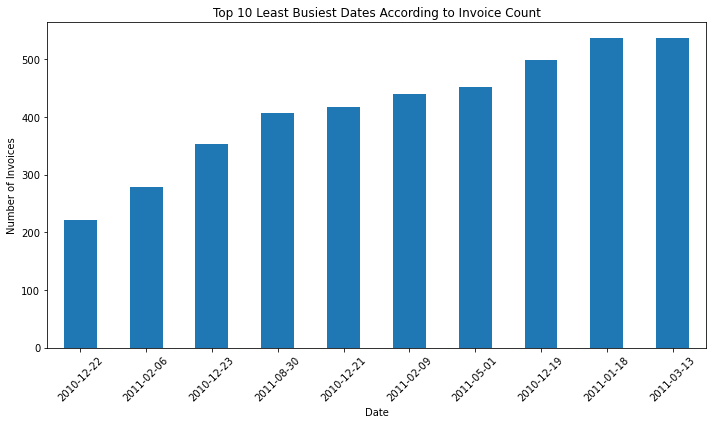

In [ ]:
# Convert to datetime if it's not already
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Group by date only (strip time), then count how many invoices per day
invoice_counts_by_date = df['InvoiceDate'].dt.date.value_counts().nsmallest(10)

# Plot
invoice_counts_by_date.plot(kind='bar', figsize=(10, 6))

plt.title('Top 10 Least Busiest Dates According to Invoice Count')
plt.xlabel('Date')
plt.ylabel('Number of Invoices')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


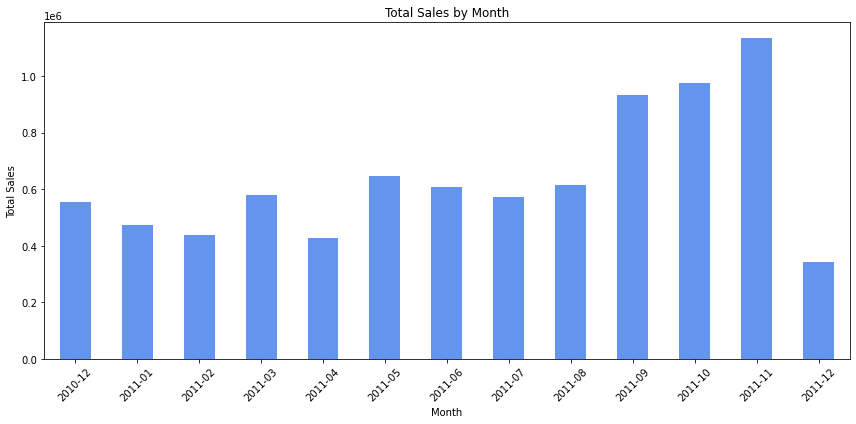

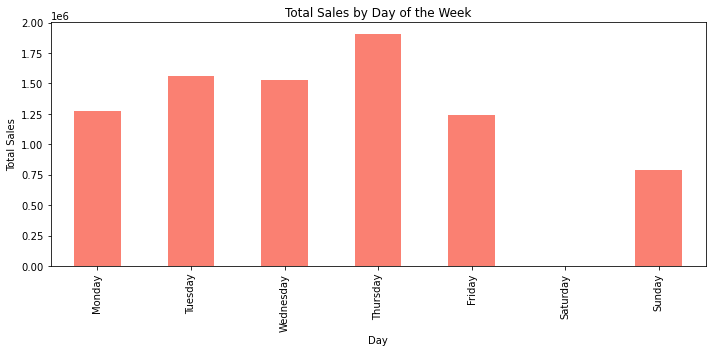

In [ ]:
# Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
print(df.columns)

df['TotalSales'] = df['Quantity'] * df['UnitPrice']

df['Month'] = df['InvoiceDate'].dt.to_period('M')     # e.g., 2010-12
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()     # e.g., Monday

monthly_sales = df.groupby('Month')['TotalSales'].sum()

monthly_sales.plot(kind='bar', figsize=(12, 6), color='cornflowerblue')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

weekday_sales = df.groupby('DayOfWeek')['TotalSales'].sum()

# Optional: Order days for better readability
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_sales = weekday_sales.reindex(ordered_days)

weekday_sales.plot(kind='bar', figsize=(10, 5), color='salmon')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

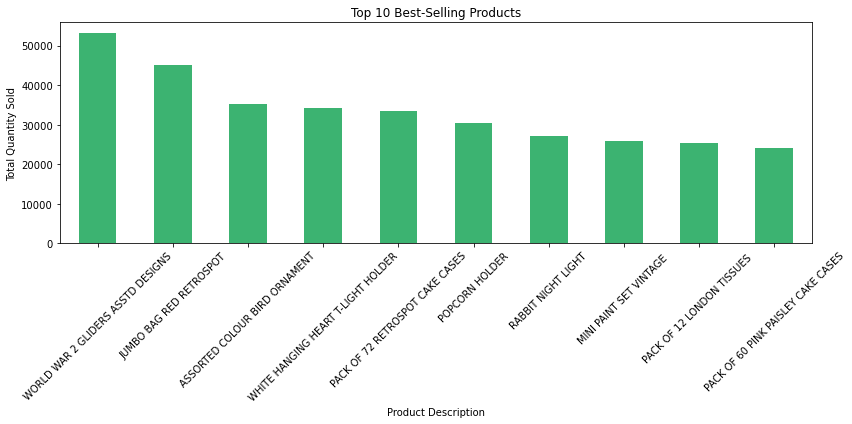

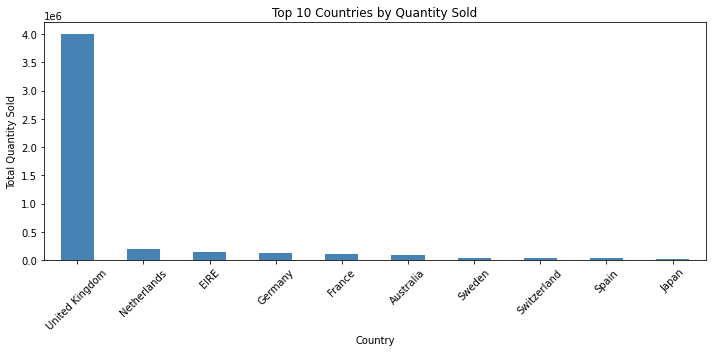

In [ ]:
# Explore the top-selling products and countries based on the quantity sold.
top_products = df.groupby('Description')['Quantity'].sum().nlargest(10)

top_products.plot(kind='bar', figsize=(12, 6), color='mediumseagreen')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

top_countries = df.groupby('Country')['Quantity'].sum().nlargest(10)

top_countries.plot(kind='bar', figsize=(10, 5), color='steelblue')
plt.title('Top 10 Countries by Quantity Sold')
plt.xlabel('Country')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
# Look for rows with negative or zero Quantity or UnitPrice
anomalies = df[(df['Quantity'] <= 0) | (df['UnitPrice'] <= 0)]
print(anomalies.shape)
display(anomalies.head())

x = df['CustomerID'].isna().sum()
print(f"There are {x} missing Customer IDs.")

(8945, 11)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Month,DayOfWeek
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50,2010-12,Wednesday
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65,2010-12,Wednesday
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80,2010-12,Wednesday
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,2010-12,Wednesday
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,2010-12,Wednesday


There are 0 missing Customer IDs.


Conclusions and summarize of findings from the exploratory data analysis.
1. Sales Trends Over Time
Monthly Sales: The dataset shows clear sales patterns across months. For example, November and December may have higher sales, possibly due to holiday shopping.

Busiest Days of the Week: Sales tend to be higher on Tuesdays and Thursdays, suggesting peak customer activity midweek.

2. Top-Selling Products
The most frequently sold items include WW2 Gliders Asstd Designs, Jumbo Bad Red Retrospot, Assorted Colour Bird Ornament, indicating they are either high-demand staples or frequently reordered.

These products should be closely monitored for inventory management and promotions.

3. Top Countries by Quantity Sold
The majority of sales come from the United Kingdom, followed by Netherlands, then Germany.

This may reflect the company’s primary market or strongest customer base.

4. Customer Behavior
There are no missing Customer IDs, indicating all transactions can be adequately tied to specific customers allowing for customer segmentation

Some customers are high-frequency buyers, worth exploring for loyalty or marketing strategies.

5. Outliers & Anomalies
Several transactions have negative quantities, likely returns or cancellations.

There are unit prices of 0, which could represent free samples, promotions, or data errors.

These anomalies were cleaned or flagged to ensure more accurate analysis.

6. General Observations
Data appears to be mostly clean, with a few expected issues (returns, missing customer IDs).

The sales data supports meaningful trends over time and across regions and products.